In [ ]:
# import os
# os.chdir("..")
# os.getcwd()

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Connect to the database
conn = sqlite3.connect("database/social_network_anonymized.db")

# Get the table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(query).fetchall()

[table[0] for table in tables]

['Media',
 'ProfileActivity',
 'ActivityMedia',
 'ProfileConnection',
 'Profiles',
 'Activity']

# Profiles Data


In [ ]:
df_profiles = pd.read_sql_query("SELECT * FROM Profiles", conn)
df_profiles

,id,name,profile_type,platform,platform_id,profile_url,region
0,1,Michael Smith,person,,409657442074875,https://www.facebook.com/user_1,western
1,2,Thomas Garcia,person,,929191280443881,https://www.facebook.com/user_2,western
2,3,Michael Williams,person,,575043098952809,https://www.facebook.com/user_3,western
3,4,John Smith,person,,40769548126554,https://www.facebook.com/user_4,western
4,5,Apichart Sukjai,person,,129878378161732,https://www.facebook.com/user_5,thai
...,...,...,...,...,...,...,...
50950,50951,Zhang Jie 2,person,FACEBOOK,,,chinese
50951,50952,Park Ji-woo 1,person,FACEBOOK,,,korean
50952,50953,Kang Ji-woo 4,person,FACEBOOK,,,korean
50953,50954,Patricia Jones 61,person,FCAI_NER,,,western


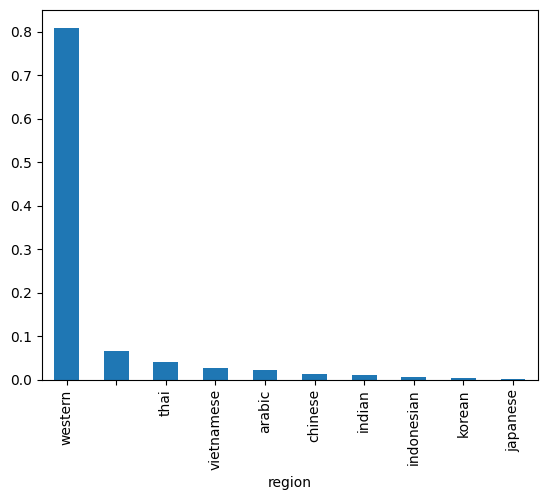

In [ ]:
df_profiles['region'].value_counts(normalize=True).plot(kind='bar');

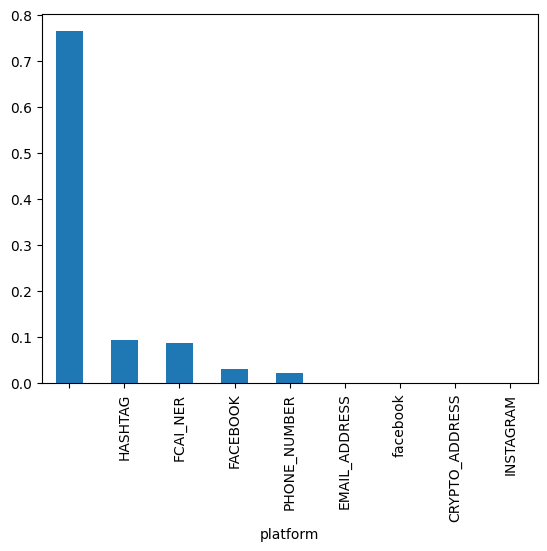

In [33]:
df_profiles['platform'].value_counts(normalize=True).plot(kind='bar');

In [36]:
df_activity = pd.read_sql_query("SELECT * FROM Activity", conn)
df_activity.head(3)

,id,type,timestamp,content,description,platform
0,1,updated-friends-list-on-facebook,1734533582000,,Michael Taylor 53 connected with John Rodrigue...,facebook
1,2,updated-friends-list-on-facebook,1734533582000,,Michael Taylor 53 connected with Robert Martin...,facebook
2,3,updated-friends-list-on-facebook,1734533582000,,Michael Taylor 53 connected with Jessica Taylor 8,facebook


In [ ]:
['Media',
 'ProfileActivity',
 'ActivityMedia',
 'ProfileConnection',
 'Profiles',
 'Activity']

In [37]:
df_media = pd.read_sql_query("SELECT * FROM Media", conn)
df_media.head(3)

,id,type,file_reference,original_url
0,1,video,AQNhLYiprPOJNFJ041YNoyQGhPgkS90J_7oFT9sapSRBr9...,
1,2,video,AQMN1fCY0O1Kdgjx594MJBjjHG5edezwuot9PcN5sPruVs...,
2,3,image,481011641_1077605357746039_1863054230928833396...,


In [38]:
df_activity_media = pd.read_sql_query("SELECT * FROM ActivityMedia", conn)
df_activity_media.head(3)

,id,activity_id,media_id,relationship_type
0,1,130597,1,attached
1,2,130598,2,attached
2,3,130599,3,attached


In [39]:
df_profile_activity = pd.read_sql_query("SELECT * FROM ProfileActivity", conn)
df_profile_activity.head(3)

,id,profile_id,activity_id,relationship_type
0,1,27059,1,source
1,2,24703,1,target
2,3,27059,2,source


In [ ]:
df_profile_connection = pd.read_sql_query("SELECT * FROM ProfileConnection", conn)
df_profile_connection.head(3)

,id,source_id,target_id,connection_type
0,1,27059,24703,ADDED_THEM_AS_A_FRIEND_ON_FACEBOOK
1,2,27059,36779,ADDED_THEM_AS_A_FRIEND_ON_FACEBOOK
2,3,27059,8299,ADDED_THEM_AS_A_FRIEND_ON_FACEBOOK
